In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [167]:
import warnings
warnings.filterwarnings("ignore")

- Loan_ID: A unique loan ID.
- Gender: Either male or female.
- Married: Weather Married(yes) or Not Marttied(No).
- Dependents: Number of persons depending on the client.
- Education: Applicant Education(Graduate or Undergraduate).
- Self_Employed: Self-employed (Yes/No).
- ApplicantIncome: Applicant income.
- CoapplicantIncome: Co-applicant income.
- LoanAmount: Loan amount in thousands.
- Loan_Amount_Term: Terms of the loan in months.
- Credit_History: Credit history meets guidelines.
- Property_Area: Applicants are living either Urban, Semi-Urban or Rural.
- Loan_Status: Loan approved (Y/N)

In [168]:
df = pd.read_csv('loan_data.csv')

In [169]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [170]:
df.shape

(381, 13)

In [171]:
df.drop(columns = ['Loan_ID'], inplace = True)

#### there are 381 customer with 13 feature 

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             376 non-null    object 
 1   Married            381 non-null    object 
 2   Dependents         373 non-null    object 
 3   Education          381 non-null    object 
 4   Self_Employed      360 non-null    object 
 5   ApplicantIncome    381 non-null    int64  
 6   CoapplicantIncome  381 non-null    float64
 7   LoanAmount         381 non-null    float64
 8   Loan_Amount_Term   370 non-null    float64
 9   Credit_History     351 non-null    float64
 10  Property_Area      381 non-null    object 
 11  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 35.8+ KB


#### as we can see here 13 column 
Loan_id - we can remove this column because it contrain only the customer id it will not help us in prediction <br>
Gender - first we need to encode it and than we will convert it into categorical type from object type and need to feel the missing values <br>
Married - same things for this column also <br>
Dependents - we will convert it into numerical 8 only from object because i don't think in that the more than 8bit value could be occure and need to feel the missing values <br>
Education - Do same what we do for Gender Column <br>
Self_Employed - same thing and in this also we needs to feel the missing values <br>
ApplicatIncome - Don't need anything <br>
CoapplicantIncome - Don't need anything <br>
LoanAmmount - Don't need anything <br>
Loan_Amount_Term - we can convert it into int from float because there is month so that's why and for this also we need to feel this missing values <br>
Credit_History - ya for this also we can convert it into int8 bit and for this also feel missing values <br>
Property_Area - we can convert it into categorical type from object <br>
Loan_Status - same what we have done for property_area

In [173]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [174]:
df.columns 

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### we will feel those missing values latter because we don't know anything about are dataset 

In [175]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status', 'Loan_Amount_Term']

In [176]:
for i in categorical_columns:
    df[i] = df[i].astype('category')

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Gender             376 non-null    category
 1   Married            381 non-null    category
 2   Dependents         373 non-null    category
 3   Education          381 non-null    category
 4   Self_Employed      360 non-null    category
 5   ApplicantIncome    381 non-null    int64   
 6   CoapplicantIncome  381 non-null    float64 
 7   LoanAmount         381 non-null    float64 
 8   Loan_Amount_Term   370 non-null    category
 9   Credit_History     351 non-null    category
 10  Property_Area      381 non-null    category
 11  Loan_Status        381 non-null    category
dtypes: category(9), float64(2), int64(1)
memory usage: 13.8 KB


In [178]:
(38.8-13.7)/38.8*100

64.69072164948454

we reduce the size of almost 64 percentage it's not big deal in that file but let's assume that if the size in TB so lets your data's size is 2Tb and you reduced it by 63 percentage so it will become 0.74TB its big deal when you work on big data

In [179]:
categorical_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'Loan_Status',
 'Loan_Amount_Term']

In [180]:
df['Dependents'].value_counts()

Dependents
0     234
2      59
1      52
3+     28
Name: count, dtype: int64

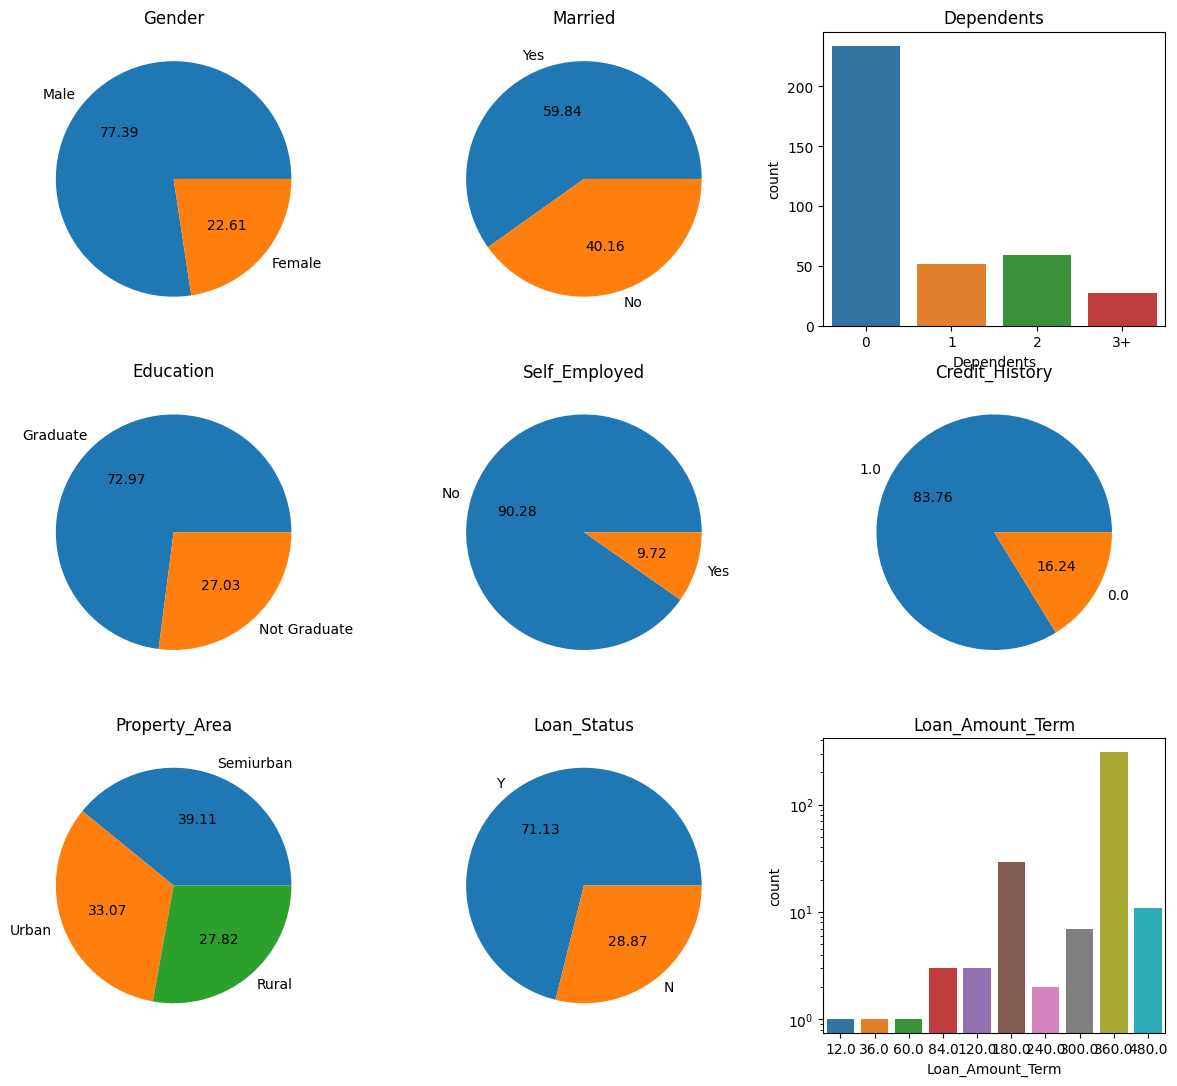

In [181]:
# colors = ['#F0F8FF','#FAEBD7','#00FFFF','#7FFFD4','#F0FFFF','#F5F5DC','#FFE4C4','#000000','#FFEBCD','#0000FF','#8A2BE2','#A52A2A','#DEB887','#5F9EA0','#7FFF00','#D2691E','#FF7F50','#6495ED','#FFF8DC','#DC143C','#00FFFF','#00008B','#008B8B','#B8860B','#A9A9A9','#006400','#BDB76B','#8B008B','#556B2F','#FF8C00','#9932CC','#8B0000','#E9967A','#8FBC8F','#483D8B','#2F4F4F','#00CED1','#9400D3','#FF1493','#00BFFF','#696969','#1E90FF','#B22222','#FFFAF0','#228B22','#FF00FF','#DCDCDC','#F8F8FF','#FFD700','#DAA520','#808080','#008000','#ADFF2F','#F0FFF0','#FF69B4','#CD5C5C','#4B0082','#FFFFF0','#F0E68C','#E6E6FA','#FFF0F5','#7CFC00','#FFFACD','#ADD8E6','#F08080','#E0FFFF','#FAFAD2','#90EE90','#D3D3D3','#FFB6C1','#FFA07A','#20B2AA','#87CEFA','#778899','#B0C4DE','#FFFFE0','#00FF00','#32CD32','#FAF0E6','#FF00FF','#800000','#66CDAA','#0000CD','#BA55D3','#9370DB','#3CB371','#7B68EE','#00FA9A','#48D1CC','#C71585','#191970','#F5FFFA','#FFE4E1','#FFE4B5','#FFDEAD','#000080','#FDF5E6','#808000','#6B8E23','#FFA500','#FF4500','#DA70D6','#EEE8AA','#98FB98','#AFEEEE','#DB7093','#FFEFD5','#FFDAB9','#CD853F','#FFC0CB','#DDA0DD','#B0E0E6','#800080','#FF0000','#BC8F8F','#4169E1','#8B4513','#FA8072','#FAA460','#2E8B57','#FFF5EE','#A0522D','#C0C0C0','#87CEEB','#6A5ACD','#708090','#FFFAFA','#00FF7F','#4682B4','#D2B48C','#008080','#D8BFD8','#FF6347','#40E0D0','#EE82EE','#F5DEB3','#FFFFFF','#F5F5F5','#FFFF00','#9ACD32']
# colors = [tuple(int(hash_code[i:i+2], 16) / 255.0 for i in (1, 3, 5)) for hash_code in colors]

rownum = 3
columnnum = 3

fig, ax = plt.subplots(rownum, columnnum, figsize = (15, 13))
indexx = 0
for i in range(rownum):
    for j in range(columnnum):
        length_ = len(df[categorical_columns[indexx]].value_counts().index)
        if length_ > 3:
            sns.countplot(df, x = df[categorical_columns[indexx]], ax = ax[i][j])
            if categorical_columns[indexx] == 'Loan_Amount_Term':
                ax[i][j].set_yscale("log")
            ax[i][j].set_title(categorical_columns[indexx])
        else:
            ax[i][j].pie(df[categorical_columns[indexx]].value_counts(), labels = list((df[categorical_columns[indexx]].value_counts()).index), autopct='%0.2f')
            ax[i][j].set_title(categorical_columns[indexx])
        indexx+=1

In [182]:

            #colors = [colors[i] for i in np.random.randint(0, len(colors), length_)]
            #ax[i][j].bar(x = df[categorical_columns[indexx]].value_counts().index, height = df[categorical_columns[indexx]].value_counts().values, color = colors)

### categorical analysis
- Gender: here you can see almost 77 percentage customer are male and rest of are female
- Married: There are almost 60 percentage customers are merried and 40 percentage customers are unmerried
- Dependent: In this dataset there are almost 250 perople are self dependent and almost 50 are depend on 1 or 2 and more 30-40 are depends on 3+ 
- Education: there are 73 customers are Graduate and 27 are not Graduate
- Self_Employed: Almost 90 percentage peoples are self Employed rest of them are i this depends on other or it could be student 
- Credit_History: in this you can see 83 credit history is one and reset's is zero
- Property_Area: almost distrbuted properply some bias in semiurban and rural 
- Loan_status: there are the 71 percentage customer with Loan_status approved and rest of are not approved (we need to give main focous on that because this is are main target coulmn)
- Loan_Amount_Term: Here you can see that 360 and 180 it mean 30 and 15 year loan is the heiest and 12, 36, 60 are the lowest 

In [183]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [184]:
numerical_columns = ['ApplicantIncome','CoapplicantIncome','LoanAmount']

In [185]:
df[numerical_columns]

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,4583,1508.0,128.0
1,3000,0.0,66.0
2,2583,2358.0,120.0
3,6000,0.0,141.0
4,2333,1516.0,95.0
...,...,...,...
376,5703,0.0,128.0
377,3232,1950.0,108.0
378,2900,0.0,71.0
379,4106,0.0,40.0


In [186]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,381.000000,381.000000,381.000000
mean,3579.845144,1277.275381,104.986877
std,1419.813818,2340.818114,28.358464
min,150.000000,0.000000,9.000000
25%,2600.000000,0.000000,90.000000
50%,3333.000000,983.000000,110.000000
75%,4288.000000,2016.000000,127.000000
max,9703.000000,33837.000000,150.000000


In [187]:
df[numerical_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    381 non-null    int64  
 1   CoapplicantIncome  381 non-null    float64
 2   LoanAmount         381 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 9.1 KB


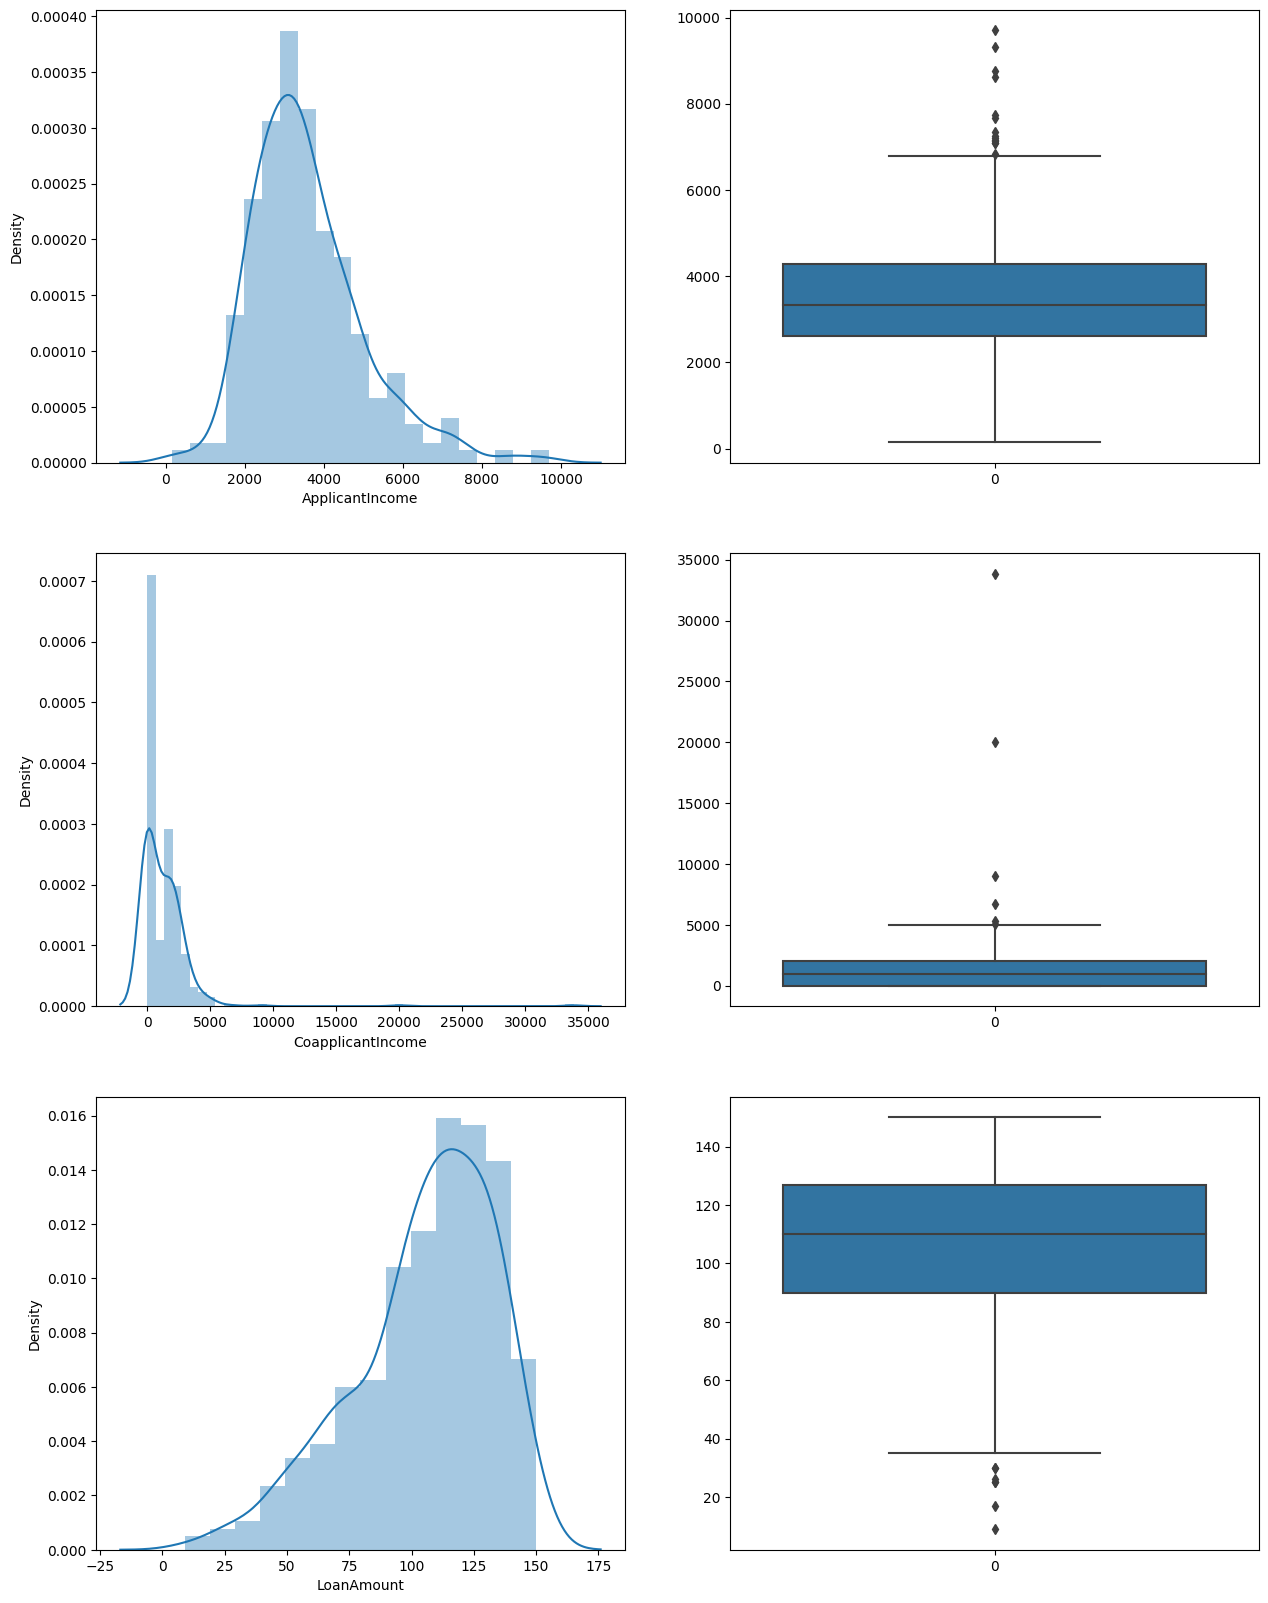

In [188]:
rownum = 3
columnnum = 2
fig, ax = plt.subplots(rownum, columnnum, figsize = (15, 20))
indexx = 0
for i in range(rownum):
    for j in range(columnnum):
        if j == 0:
            sns.distplot(df[numerical_columns[indexx]].dropna(), ax = ax[i][j])
        else:
            sns.boxplot(df[numerical_columns[indexx]].dropna(), ax = ax[i][j])
            indexx+=1

### Numerical columns analysis
Here we can see that there are many outliers in all the numerical columns 
- ApplicatIncome : in this the data seems to be normal but not exactly and some of the outliers are present inside of high values
- CoapplicatIncome : This is pure left skewed data and outliers are also present in that data 
- LoanAmount : this is right skewed data and outliers present in lower value's side 

## Bivariate Analysis Num-Num

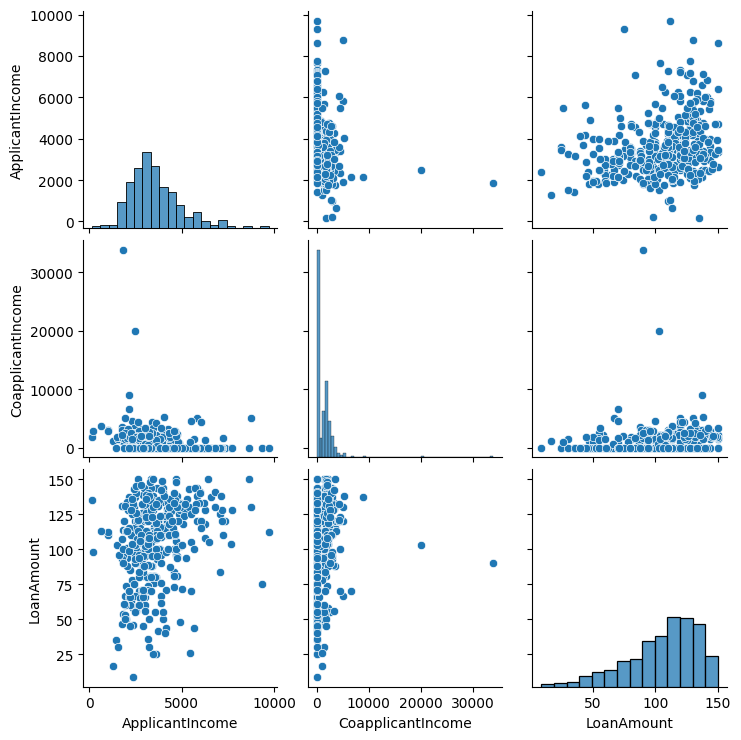

In [189]:
sns.pairplot(df)

In [190]:
df[numerical_columns].corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount
ApplicantIncome,1.000000,-0.248693,0.270681
CoapplicantIncome,-0.248693,1.000000,0.114936
LoanAmount,0.270681,0.114936,1.000000


it seems like columns are not related to each other its okey 

## Cat-Cat

In [191]:
df[categorical_columns]

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Loan_Amount_Term
0,Male,Yes,1,Graduate,No,1.0,Rural,N,360.0
1,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,360.0
2,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,360.0
3,Male,No,0,Graduate,No,1.0,Urban,Y,360.0
4,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,360.0
...,...,...,...,...,...,...,...,...,...
376,Male,Yes,3+,Graduate,No,1.0,Urban,Y,360.0
377,Male,Yes,0,Graduate,No,1.0,Rural,Y,360.0
378,Female,No,0,Graduate,No,1.0,Rural,Y,360.0
379,Male,Yes,3+,Graduate,No,1.0,Rural,Y,180.0


### our main column is Loan_Status so we will focous on that coulmn

In [192]:
def plot_bi_cat(coulmn_name):
    sns.countplot(df, x = 'Loan_Status', hue = coulmn_name)

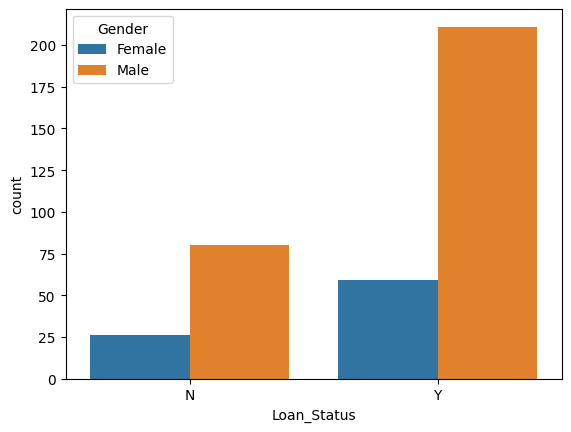

In [193]:
plot_bi_cat('Gender')

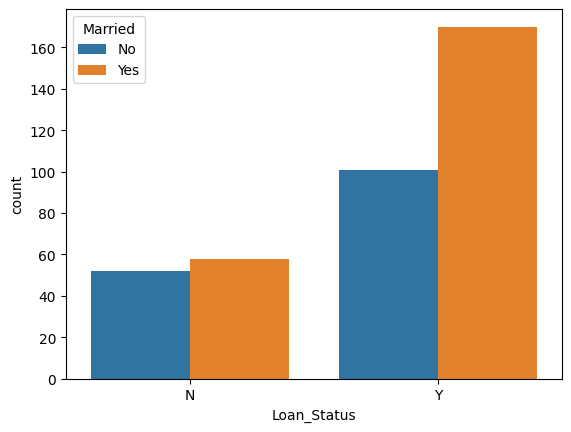

In [194]:
plot_bi_cat('Married')

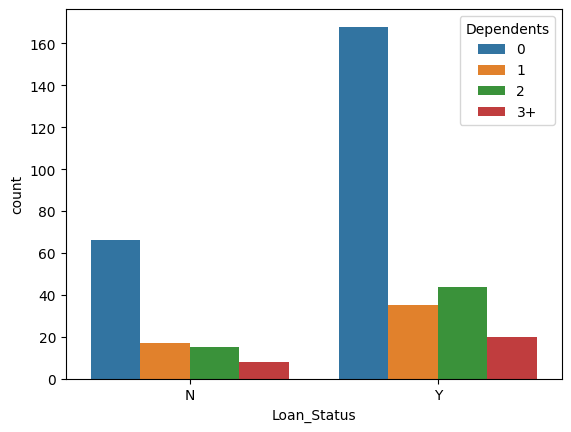

In [195]:
plot_bi_cat('Dependents')

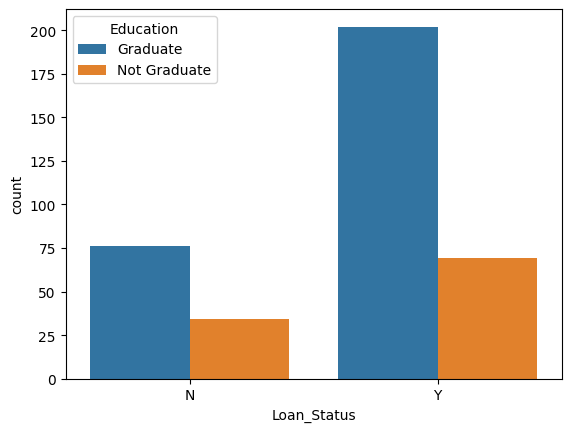

In [196]:
plot_bi_cat('Education')

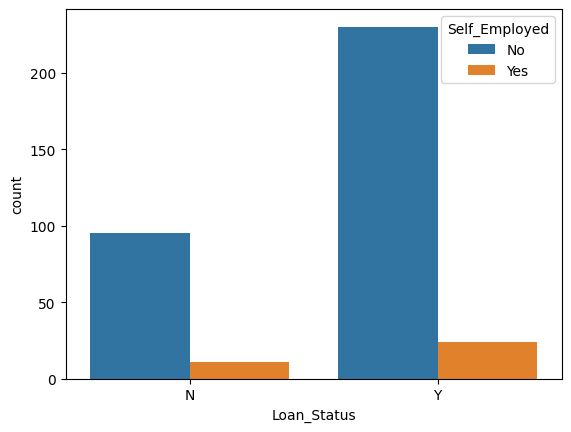

In [197]:
plot_bi_cat('Self_Employed')

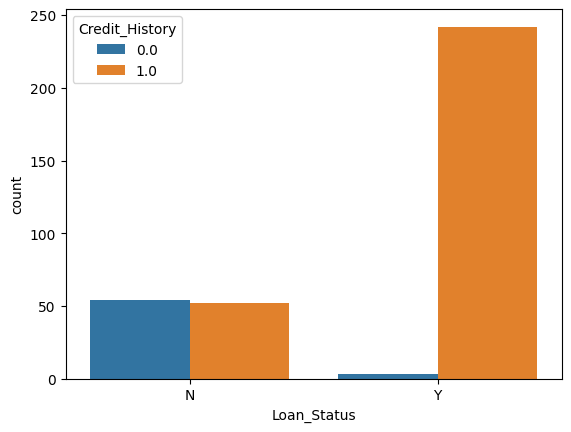

In [198]:
plot_bi_cat('Credit_History')

It's like the company give the loan whose credit history is 1 and if not gave the loan whose credit histoy is zero and if one and company is not providing you loan it could be outher factor

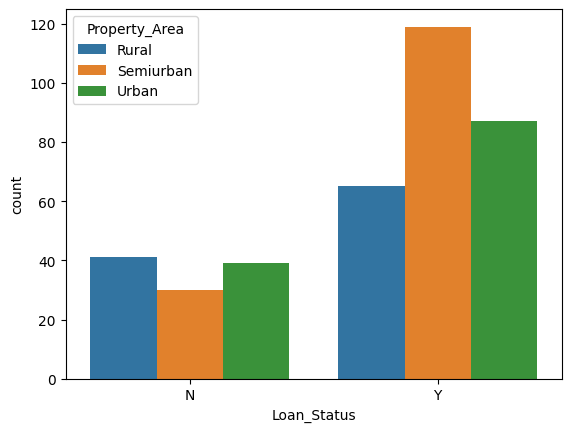

In [199]:
plot_bi_cat('Property_Area')

In [200]:
df_ = df.copy()

In [201]:
df_.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [202]:
x = df.isna().sum()
x = x[x>0]

In [203]:
x.index

Index(['Gender', 'Dependents', 'Self_Employed', 'Loan_Amount_Term',
       'Credit_History'],
      dtype='object')

In [204]:
df_['Loan_Amount_Term'] = df_['Loan_Amount_Term'].astype('float')
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Gender             376 non-null    category
 1   Married            381 non-null    category
 2   Dependents         373 non-null    category
 3   Education          381 non-null    category
 4   Self_Employed      360 non-null    category
 5   ApplicantIncome    381 non-null    int64   
 6   CoapplicantIncome  381 non-null    float64 
 7   LoanAmount         381 non-null    float64 
 8   Loan_Amount_Term   370 non-null    float64 
 9   Credit_History     351 non-null    category
 10  Property_Area      381 non-null    category
 11  Loan_Status        381 non-null    category
dtypes: category(8), float64(3), int64(1)
memory usage: 16.1 KB


In [205]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [206]:
for i in x.index:
    if df_[i].dtype == 'category':
        df_[i] = df_[i].fillna(df_[i].mode()[0])
    else:
        df_[i] = df_[i].fillna(df_[i].mean())

In [207]:
df_.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [208]:
x = df_.iloc[:, :-1]
y = df_.iloc[:, -1]


In [209]:
y.shape

(381,)

In [210]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [211]:
x_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
183,Male,Yes,2,Graduate,No,4400,0.0,127.0,360.0,0.0,Semiurban
306,Male,Yes,0,Graduate,No,2083,3150.0,128.0,360.0,1.0,Semiurban
6,Male,Yes,2,Graduate,No,2500,1840.0,109.0,360.0,1.0,Urban
270,Male,Yes,0,Graduate,No,2666,4300.0,121.0,360.0,1.0,Rural
368,Male,Yes,0,Graduate,No,2297,1522.0,104.0,360.0,1.0,Urban


In [212]:
stscaler = StandardScaler()

In [239]:
from joblib import dump
# Save the model
dump(stscaler, 'scaler.joblib')

['scaler.joblib']

In [213]:
numerical_columns.append('Loan_Amount_Term')

In [214]:
for i in numerical_columns:
    x_train[i] = stscaler.fit_transform(x_train[i].values.reshape(-1, 1))
    x_test[i] = stscaler.transform(x_test[i].values.reshape(-1, 1))

In [215]:
x_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
183,Male,Yes,2,Graduate,No,0.579704,-0.527927,0.796994,0.308528,0.0,Semiurban
306,Male,Yes,0,Graduate,No,-1.084354,0.851131,0.831825,0.308528,1.0,Semiurban
6,Male,Yes,2,Graduate,No,-0.784867,0.277618,0.170031,0.308528,1.0,Urban
270,Male,Yes,0,Graduate,No,-0.665646,1.354596,0.588006,0.308528,1.0,Rural
368,Male,Yes,0,Graduate,No,-0.930660,0.138398,-0.004125,0.308528,1.0,Urban


In [216]:
categorical_columns.remove('Loan_Amount_Term')
categorical_columns.remove('Loan_Status')

In [217]:
categorical_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area']

In [218]:
oencoder = OrdinalEncoder()
for i in categorical_columns:
    x_train[i] = oencoder.fit_transform(x_train[i].values.reshape(-1, 1))
    x_train[i] = x_train[i].astype('Int8')
    x_test[i] = oencoder.transform(x_test[i].values.reshape(-1, 1))
    x_test[i] = x_test[i].astype('Int8')

In [240]:
from joblib import dump
# Save the model
dump(oencoder, 'encoder.joblib')

['encoder.joblib']

In [219]:
lencoder = LabelEncoder()
y_train = lencoder.fit_transform(y_train)
y_test = lencoder.transform(y_test)

In [220]:
y_train

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,

In [221]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

randomForest = RandomForestClassifier() 
decisitonTree = DecisionTreeClassifier()
logisticRegression = LogisticRegression()
Supportvm = SVC()
multilp = MLPClassifier()
addabc = AdaBoostClassifier()

classifiers = [randomForest, decisitonTree, logisticRegression, Supportvm, multilp, addabc]
detail = []
for model in classifiers:
    infoList = []
    infoList.append(type(model).__name__)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    pred = []
    for i in predictions:
        if i>0.5:
            pred.append(1)
        else:
            pred.append(0)
    infoList.append(accuracy_score(y_test, pred))
    for i in confusion_matrix(y_test, pred):
        for j in i:
            infoList.append(j)
    detail.append(infoList)

In [222]:
pd.DataFrame(detail, columns = ['model_name', 'accuracy', 'TP', 'FN', 'FP', 'TN']).sort_values('accuracy', ascending=False)

,model_name,accuracy,TP,FN,FP,TN
5,AdaBoostClassifier,0.883117,14,8,1,54
3,SVC,0.870130,12,10,0,55
0,RandomForestClassifier,0.857143,12,10,1,54
2,LogisticRegression,0.857143,11,11,0,55
4,MLPClassifier,0.857143,12,10,1,54
1,DecisionTreeClassifier,0.805195,14,8,7,48


In [223]:
from sklearn.model_selection import GridSearchCV
rf_model = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [232]:
best_params = grid_search.best_params_

# Train the model with the best parameters
model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf']
)

In [233]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [234]:
predtictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

0.8831168831168831
[[14  8]
 [ 1 54]]


In [235]:
# import tensorflow as tf
# from tensorflow import keras
# from keras.models import Sequential
# from keras.layers import Dense, Dropout

# model = Sequential()

# model.add(Dense(256, activation='relu', input_dim = 11))
# model.add(Dense(256, activation='relu', kernel_regularizer=keras.regularizers.L2(0.2)))
# Dropout(0.07)
# model.add(Dense(128, activation='relu', kernel_regularizer=keras.regularizers.L2(0.2)))
# Dropout(0.5)
# model.add(Dense(16, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

# model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00005), loss='binary_crossentropy', metrics=['accuracy'])
# x_train = x_train.astype('float')
# x_test = x_test.astype('float')

# history = model.fit(x_train, y_train, epochs = 500, validation_data=(x_test, y_test))

In [236]:
# plt.figure(figsize=(15, 8))

# plt.subplot(121)
# plt.plot(history.history['loss'], label = 'train')
# plt.plot(history.history['val_loss'], label = 'test')
# plt.legend()
# plt.subplot(122)
# plt.plot(history.history['accuracy'], label = 'train')
# plt.plot(history.history['val_accuracy'], label = 'test')
# plt.legend()

In [237]:
# prediction = model.predict(x_test)
# prediction = [1 if i>0.5 else 0 for i in prediction]
# print(accuracy_score(y_test, prediction))
# print(confusion_matrix(y_test, prediction))

### We can't achive the the accuracy more than 85.5 because we tries a lot in randomforest and in neural network also if we want to achive more accuracy than we need more data to learn properly 

AttributeError: 'RandomForestClassifier' object has no attribute 'save'

In [ ]:
from joblib import dump
model = model

# Save the model
dump(model, 'model.joblib')